In [2]:
%gui qt
import mne
import os
import numpy as np
import matplotlib.pyplot as plt

mne.set_log_level('WARNING')
import pandas as pd
import time
from scipy.interpolate import CubicSpline
from scipy.integrate import quad
import seaborn as sns
# sns.set_palette('Pastel1')

from tqdm import tqdm

In [3]:
root_data_dir = r'E:\ZKP\persons comparision\Band Analysis\Epoch\Epoch_Super'

band_names=['delta','theta','alpha','beta','gamma']

def averageAndConcat(local_path,category=""):
    files=[os.path.join(local_path,file+'.xlsx') for file in band_names]
    list_tmp=[]
    for index,file in enumerate(files):
        df=pd.read_excel(file)
        df=df['Overall']
        list_tmp.append(df)
    df=pd.concat(list_tmp,axis=1)
    df.columns=band_names
    melted = pd.melt(df, var_name='class', value_name='value',ignore_index=False)
    result = pd.merge(df, melted[['value', 'class']], left_index=True, right_on=melted.index,)
    result = result.drop(columns=['delta', 'theta', 'beta',"alpha","gamma"])
    result = result[['class', 'value']].reset_index(drop=True)
    result['Category']=category
    del df
    return result
   

Extract the data of resting state before and after stimuli

In [23]:
sns.set_style('ticks')
data_before=averageAndConcat(os.path.join(root_data_dir,'drug_before_rest'),category='Before_TMS')
data_after=averageAndConcat(os.path.join(root_data_dir,'drug_after_rest'),category='After_TMS')
data_health=averageAndConcat(os.path.join(root_data_dir,'health_rest'),category='Health')
data=pd.concat([data_before,data_after,data_health])
# data=data[data['class']!="delta"]
rest_data=data
del data_before,data_after,data_health,data
data_before=averageAndConcat(os.path.join(root_data_dir,'drug_before_rest_af'),category='Before_TMS')
data_after=averageAndConcat(os.path.join(root_data_dir,'drug_after_rest_af'),category='After_TMS')
data_health=averageAndConcat(os.path.join(root_data_dir,'health_rest_af'),category='Health')
data=pd.concat([data_before,data_after,data_health])
# data=data[data['class']!="delta"]
rest_data_af=data

In [24]:
rest_data_af['class'] = rest_data_af['class'].apply(lambda x: x.capitalize())
rest_data['class'] = rest_data['class'].apply(lambda x: x.capitalize())

In [25]:

# change Before_TMS in category colum to MBT, After_TMS to MAT, Health to HC,define a function to do this
def change_category(x):
    if x=='Before_TMS':
        return 'MBT'
    elif x=='After_TMS':
        return 'MAT'
    else:
        return 'HC'
rest_data_af['Category']=rest_data_af['Category'].apply(change_category)
rest_data['Category']=rest_data['Category'].apply(change_category)

Visual Resting-state

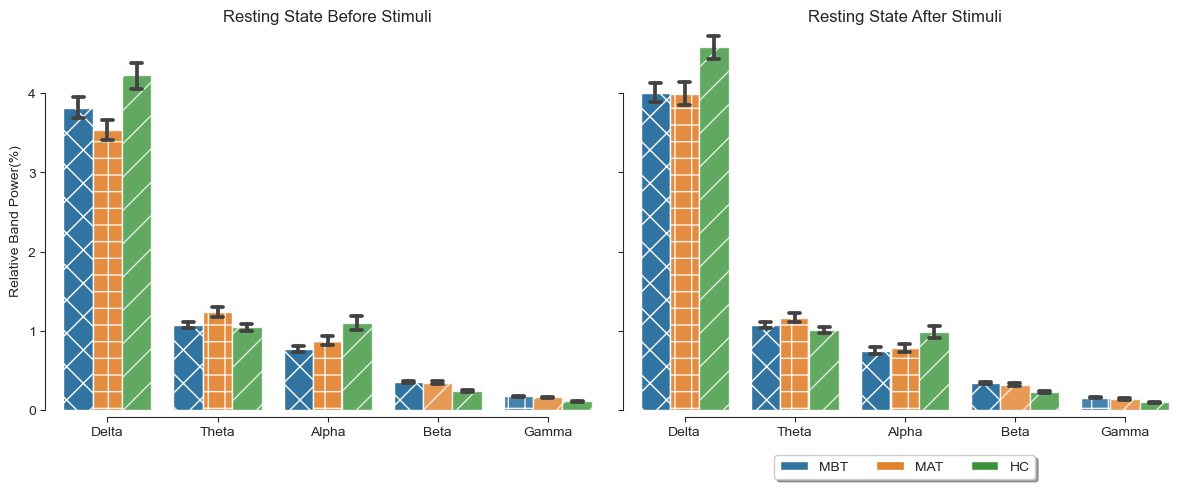

In [33]:


fig,axes=plt.subplots(ncols=2,sharey=True,figsize=(12, 5))

sns.barplot(data=rest_data,x='class',y='value',hue='Category',ax=axes[0],capsize=.1)
sns.barplot(data=rest_data_af,x='class',y='value',hue='Category',ax=axes[1],capsize=.1)
axes[0].set_title("Resting State Before Stimuli")
axes[0].set_ylabel("Relative Band Power(%)")
axes[0].set_xlabel("")
axes[0].get_legend().remove()
axes[1].set_title("Resting State After Stimuli")
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=3)

for ax in axes:
    ax.set_ylim(0,4.8)
    for i, bar in enumerate(ax.patches):
        if i in [j for j in range(0,4,1)]:
            bar.set_hatch('x')
            bar.set_alpha(1)
        elif i in [j for j in range(4,8,1)]:
            bar.set_hatch('+')
            bar.set_alpha(0.9)
        else:
            bar.set_hatch('/')
            bar.set_alpha(0.8)
sns.despine(fig,offset=5,trim=True)
fig.tight_layout()

t-test

In [8]:
# define a function,to do the relevant t test,return p value
from scipy.stats import ttest_rel
def t_test(a,b):
    return ttest_rel(a,b).pvalue


In [9]:
# define a function,to extract the value data base on category and class given
def extract_data(table,category,class_name):
    return table[(rest_data['Category']==category)&(rest_data['class']==class_name)]['value'].values


0.002944515631654946

In [61]:
band_='Alpha'
group_='MBT'
a=extract_data(rest_data,group_,band_)
b=extract_data(rest_data_af,group_,band_)
print(np.mean(a),np.mean(b))
print(ttest_rel(a,b),)

In [66]:
band_='Delta'
a=extract_data(rest_data_af,'MBT',band_)
b=extract_data(rest_data_af,'MAT',band_)
print(np.mean(a),np.mean(b))
print(ttest_rel(a,b),)

4.0048867603570955 3.9941715291438147
TtestResult(statistic=0.11946632977865011, pvalue=0.9049861418403468, df=299)
